In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

pd.set_option('display.max_columns', None)

In [4]:
# Load the dataset
df = pd.read_csv(r"C:\Users\yassi\Downloads\Property Prices in Tunisia.csv")

# Basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())

print("\nDataset Info:")
df.info()

print("\nBasic Statistics:")
display(df.describe())


Dataset Shape: (12748, 9)

First 5 rows:


,category,room_count,bathroom_count,size,type,price,city,region,log_price
0,Terrains et Fermes,-1.0,-1.0,-1.0,À Vendre,100000.0,Ariana,Raoued,5.000000
1,Terrains et Fermes,-1.0,-1.0,-1.0,À Vendre,316000.0,Ariana,Autres villes,5.499687
2,Appartements,2.0,1.0,80.0,À Louer,380.0,Ariana,Autres villes,2.579784
3,Locations de vacances,1.0,1.0,90.0,À Louer,70.0,Ariana,Autres villes,1.845098
4,Appartements,2.0,2.0,113.0,À Vendre,170000.0,Ariana,Ariana Ville,5.230449



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12748 entries, 0 to 12747
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   category        12748 non-null  object 
 1   room_count      12748 non-null  float64
 2   bathroom_count  12748 non-null  float64
 3   size            12748 non-null  float64
 4   type            12748 non-null  object 
 5   price           12748 non-null  float64
 6   city            12748 non-null  object 
 7   region          12748 non-null  object 
 8   log_price       12748 non-null  float64
dtypes: float64(5), object(4)
memory usage: 896.5+ KB

Basic Statistics:


,room_count,bathroom_count,size,price,log_price
count,12748.000000,12748.000000,12748.000000,1.274800e+04,12748.000000
mean,1.759649,0.759884,130.896219,1.601575e+07,4.374245
std,2.171468,1.264812,184.074990,1.016644e+09,1.389788
min,-1.000000,-1.000000,-1.000000,1.000000e+01,1.000000
25%,-1.000000,-1.000000,-1.000000,8.500000e+02,2.929419
50%,2.000000,1.000000,95.000000,8.975000e+04,4.953033
75%,3.000000,1.000000,150.000000,2.600000e+05,5.414973
max,20.000000,10.000000,2000.000000,1.000000e+11,11.000000


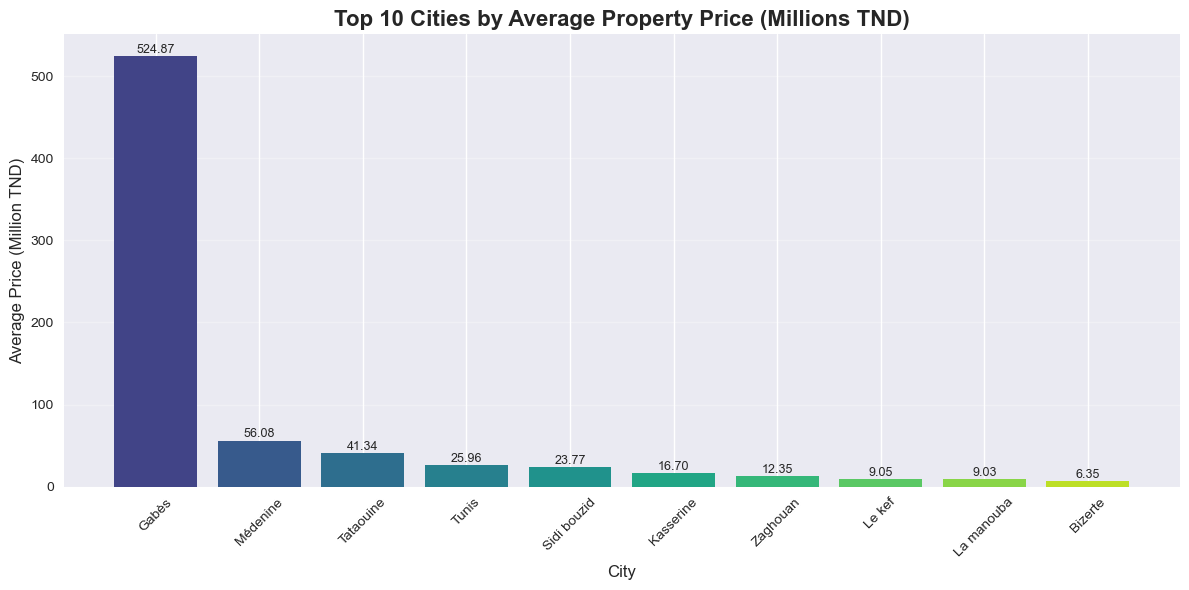

In [9]:
city_avg_price = df.groupby('city')['price'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
bars = plt.bar(city_avg_price.index, city_avg_price.values / 1e6, color=plt.cm.viridis(np.linspace(0.2, 0.9, 10)))
plt.title('Top 10 Cities by Average Property Price (Millions TND)', fontsize=16, weight='bold')
plt.xlabel('City', fontsize=12)
plt.ylabel('Average Price (Million TND)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.05,
             f'{height:.2f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

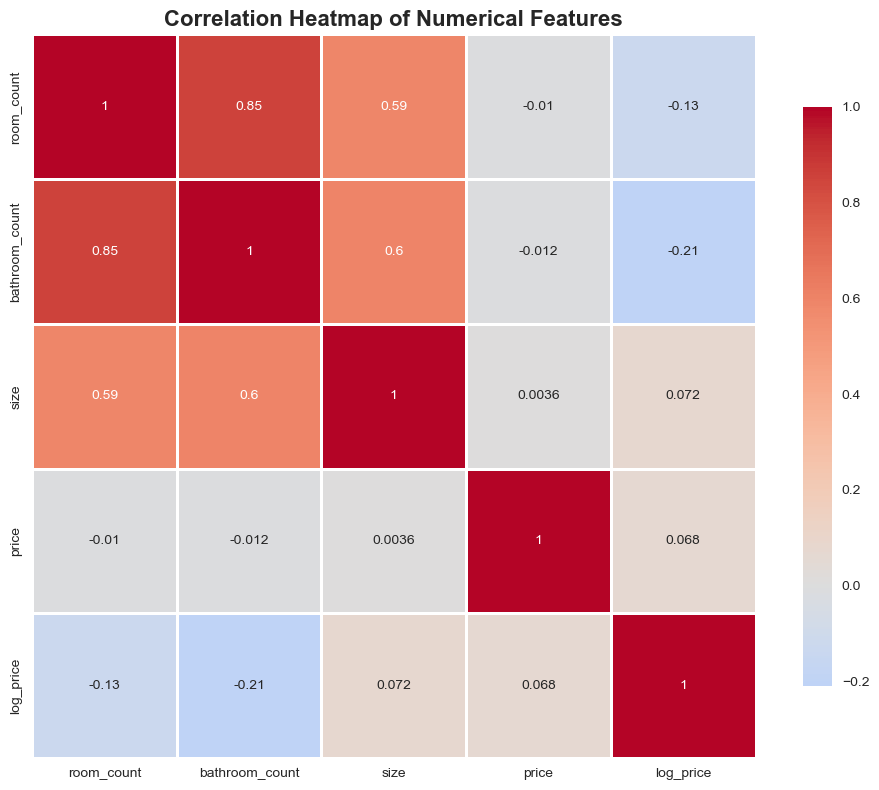

In [11]:
numerical_cols = ['room_count', 'bathroom_count', 'size', 'price', 'log_price']
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap of Numerical Features', fontsize=16, weight='bold')
plt.tight_layout()
plt.show()

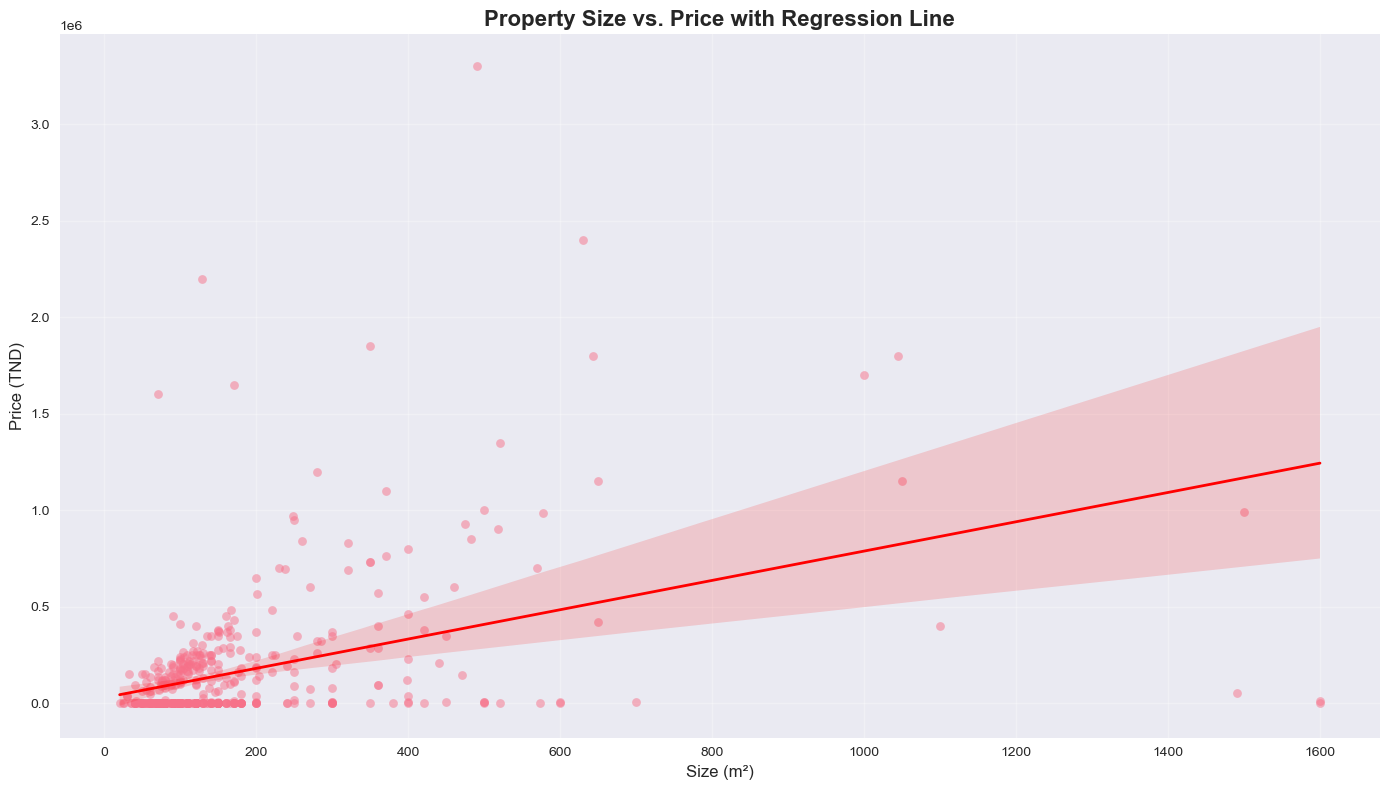

In [15]:
valid_data = df[(df['size'] > 0) & (df['price'] < 5e6)].sample(500, random_state=42)

plt.figure(figsize=(14, 8))
sns.regplot(data=valid_data, x='size', y='price', scatter_kws={'alpha':0.5, 's':40},
            line_kws={'color': 'red', 'linewidth': 2})

plt.title('Property Size vs. Price with Regression Line', fontsize=16, weight='bold')
plt.xlabel('Size (m²)', fontsize=12)
plt.ylabel('Price (TND)', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

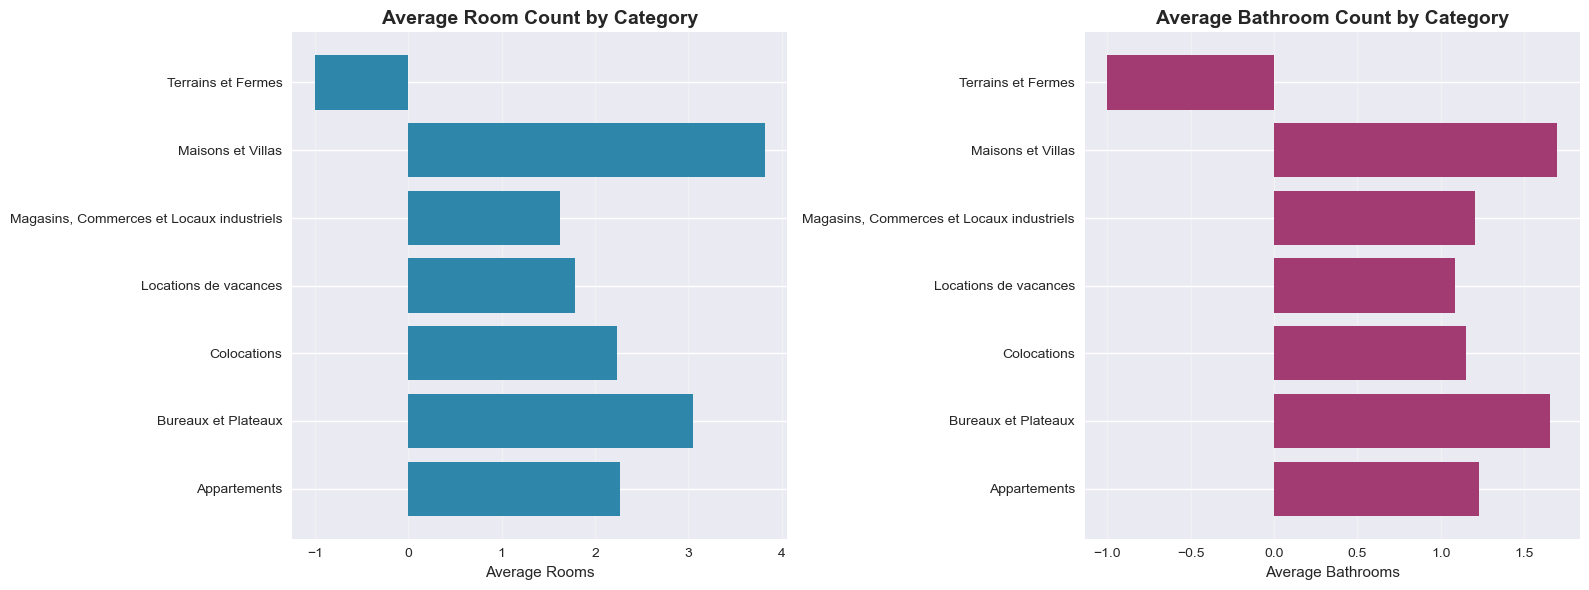

In [17]:
avg_features = df.groupby('category')[['room_count', 'bathroom_count']].mean()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
colors = ['#2E86AB', '#A23B72']

axes[0].barh(avg_features.index, avg_features['room_count'], color=colors[0])
axes[0].set_title('Average Room Count by Category', fontsize=14, weight='bold')
axes[0].set_xlabel('Average Rooms')
axes[0].grid(axis='x', alpha=0.3)

axes[1].barh(avg_features.index, avg_features['bathroom_count'], color=colors[1])
axes[1].set_title('Average Bathroom Count by Category', fontsize=14, weight='bold')
axes[1].set_xlabel('Average Bathrooms')
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()